# IN THIS NOTEBOOK WE ARE GOING TO PREDICT THE TYPE OF CANCER B/M
Getting and preparing the data
Basic Visualization
Outlier Detection
Train Test Split
BASIC KNN
PCA
Visualization
Find the Wrong Decision
Logistic Regression
Hyperparameter Tuning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# LETS FIRST IMPORT LIBRARIES

In [2]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("Breast Cancer Data.csv")

In [4]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data.drop(["id","Unnamed: 32"],axis = 1,inplace = True)
data = data.rename(columns = {"diagnosis":"type"})
data["type"] = [1 if i.strip() == "M" else 0 for i in data["type"]]
y = data["type"]
#data.drop(["type"],axis = 1,inplace = True)
data.head()

type  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     1        17.99         10.38          122.80     1001.0   
1     1        20.57         17.77          132.90     1326.0   
2     1        19.69         21.25          130.00     1203.0   
3     1        11.42         20.38           77.58      386.1   
4     1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Lets visualize and see the numbers

0    357
1    212
Name: type, dtype: int64


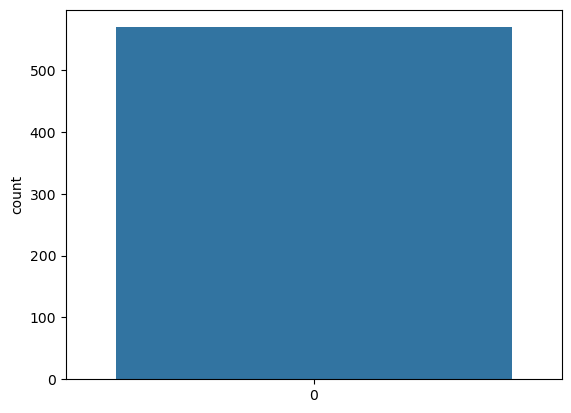

In [6]:
sns.countplot(data["type"])
print(data["type"].value_counts())

Lets see the correlation

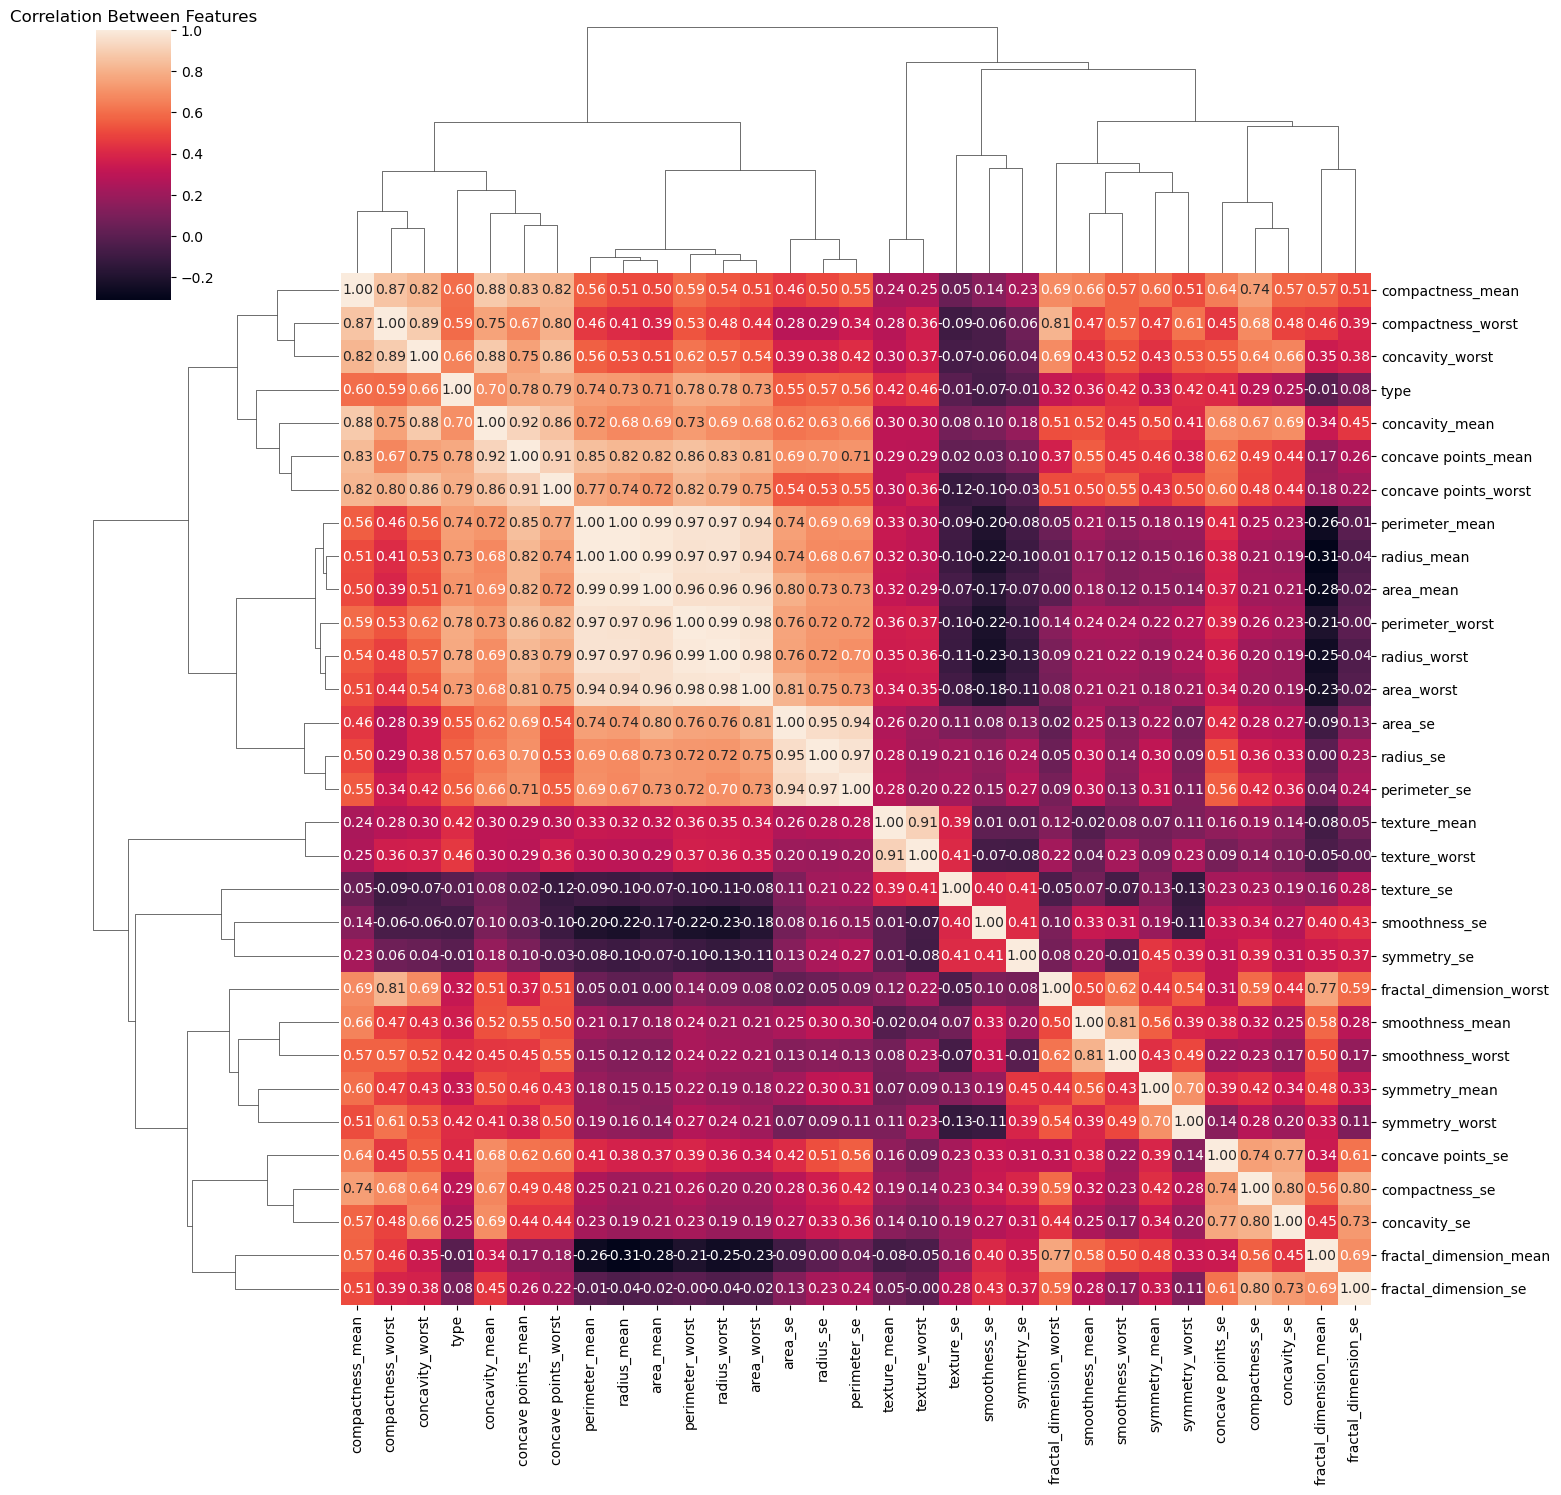

In [7]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix,annot = True,fmt = ".2f",figsize = (15,15))
plt.title("Correlation Between Features")
plt.show()

Lets look at another map with a threshold(restriction)

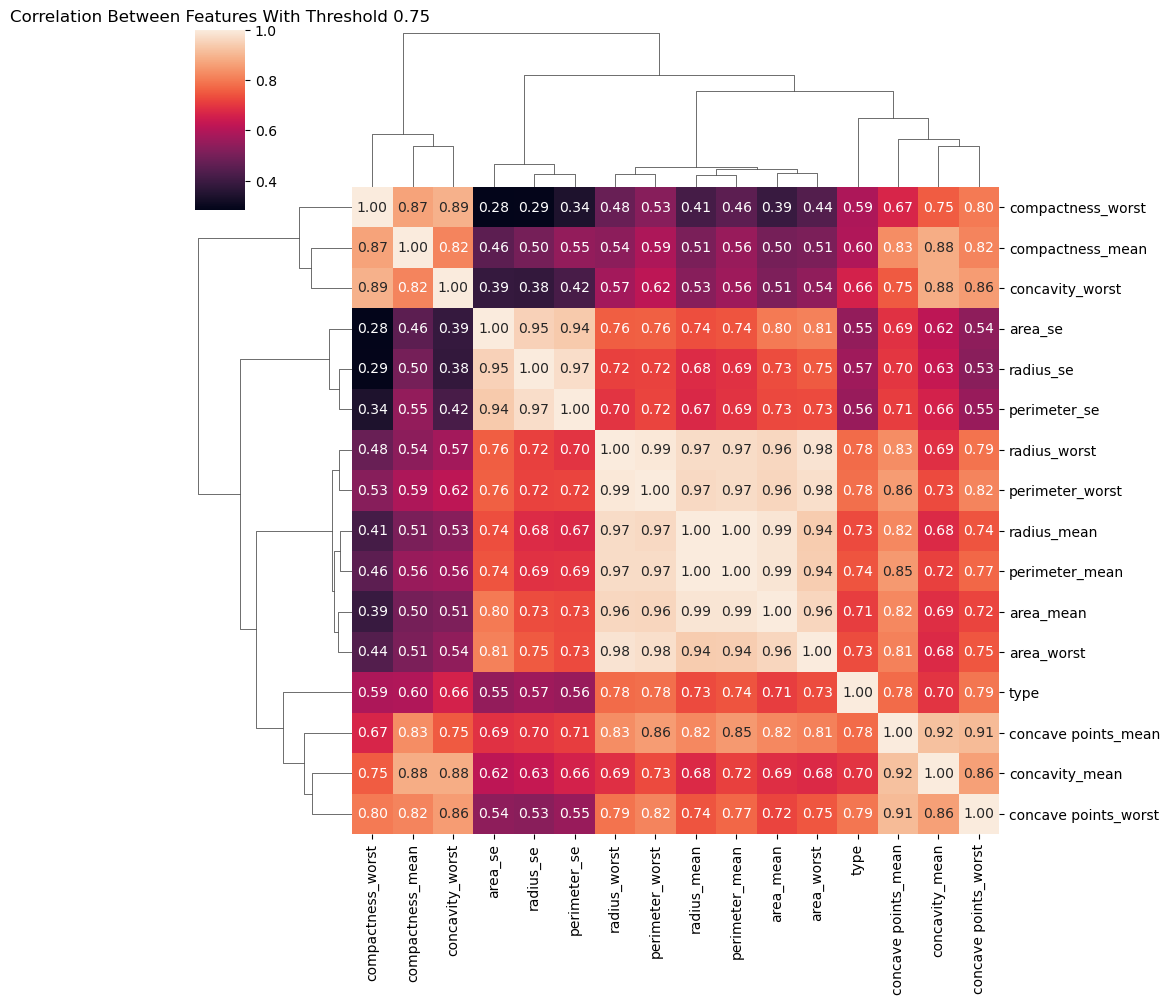

In [8]:
threshold = 0.5
filter1 = np.abs(corr_matrix["type"] > threshold) # Features which have more than 0.75 correlation with 'type'
corr_features = corr_matrix.columns[filter1].tolist()
sns.clustermap(data[corr_features].corr(),annot = True,fmt = ".2f",figsize = (10,10))
plt.title("Correlation Between Features With Threshold 0.75")
plt.show()

Box Plot

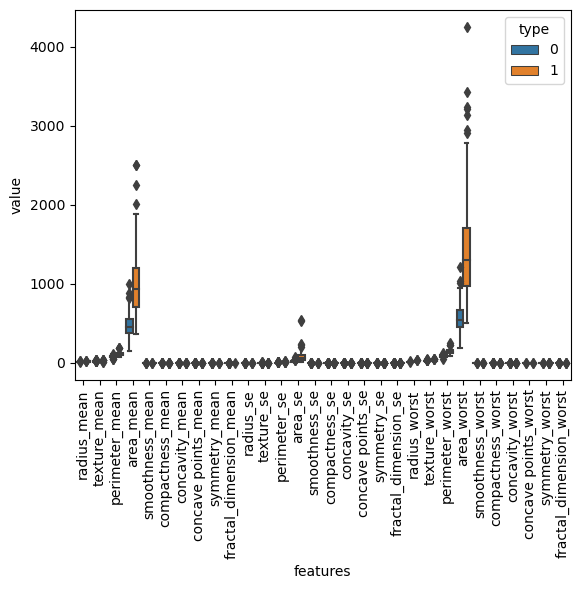

In [9]:
#First melt() the data
data_melted = pd.melt(data,id_vars = "type",var_name = "features",value_name = "value")
plt.figure()
sns.boxplot(x = "features",
           y = "value",
           hue = "type",
           data = data_melted)
plt.xticks(rotation = 90)
plt.show()

Pair Plot

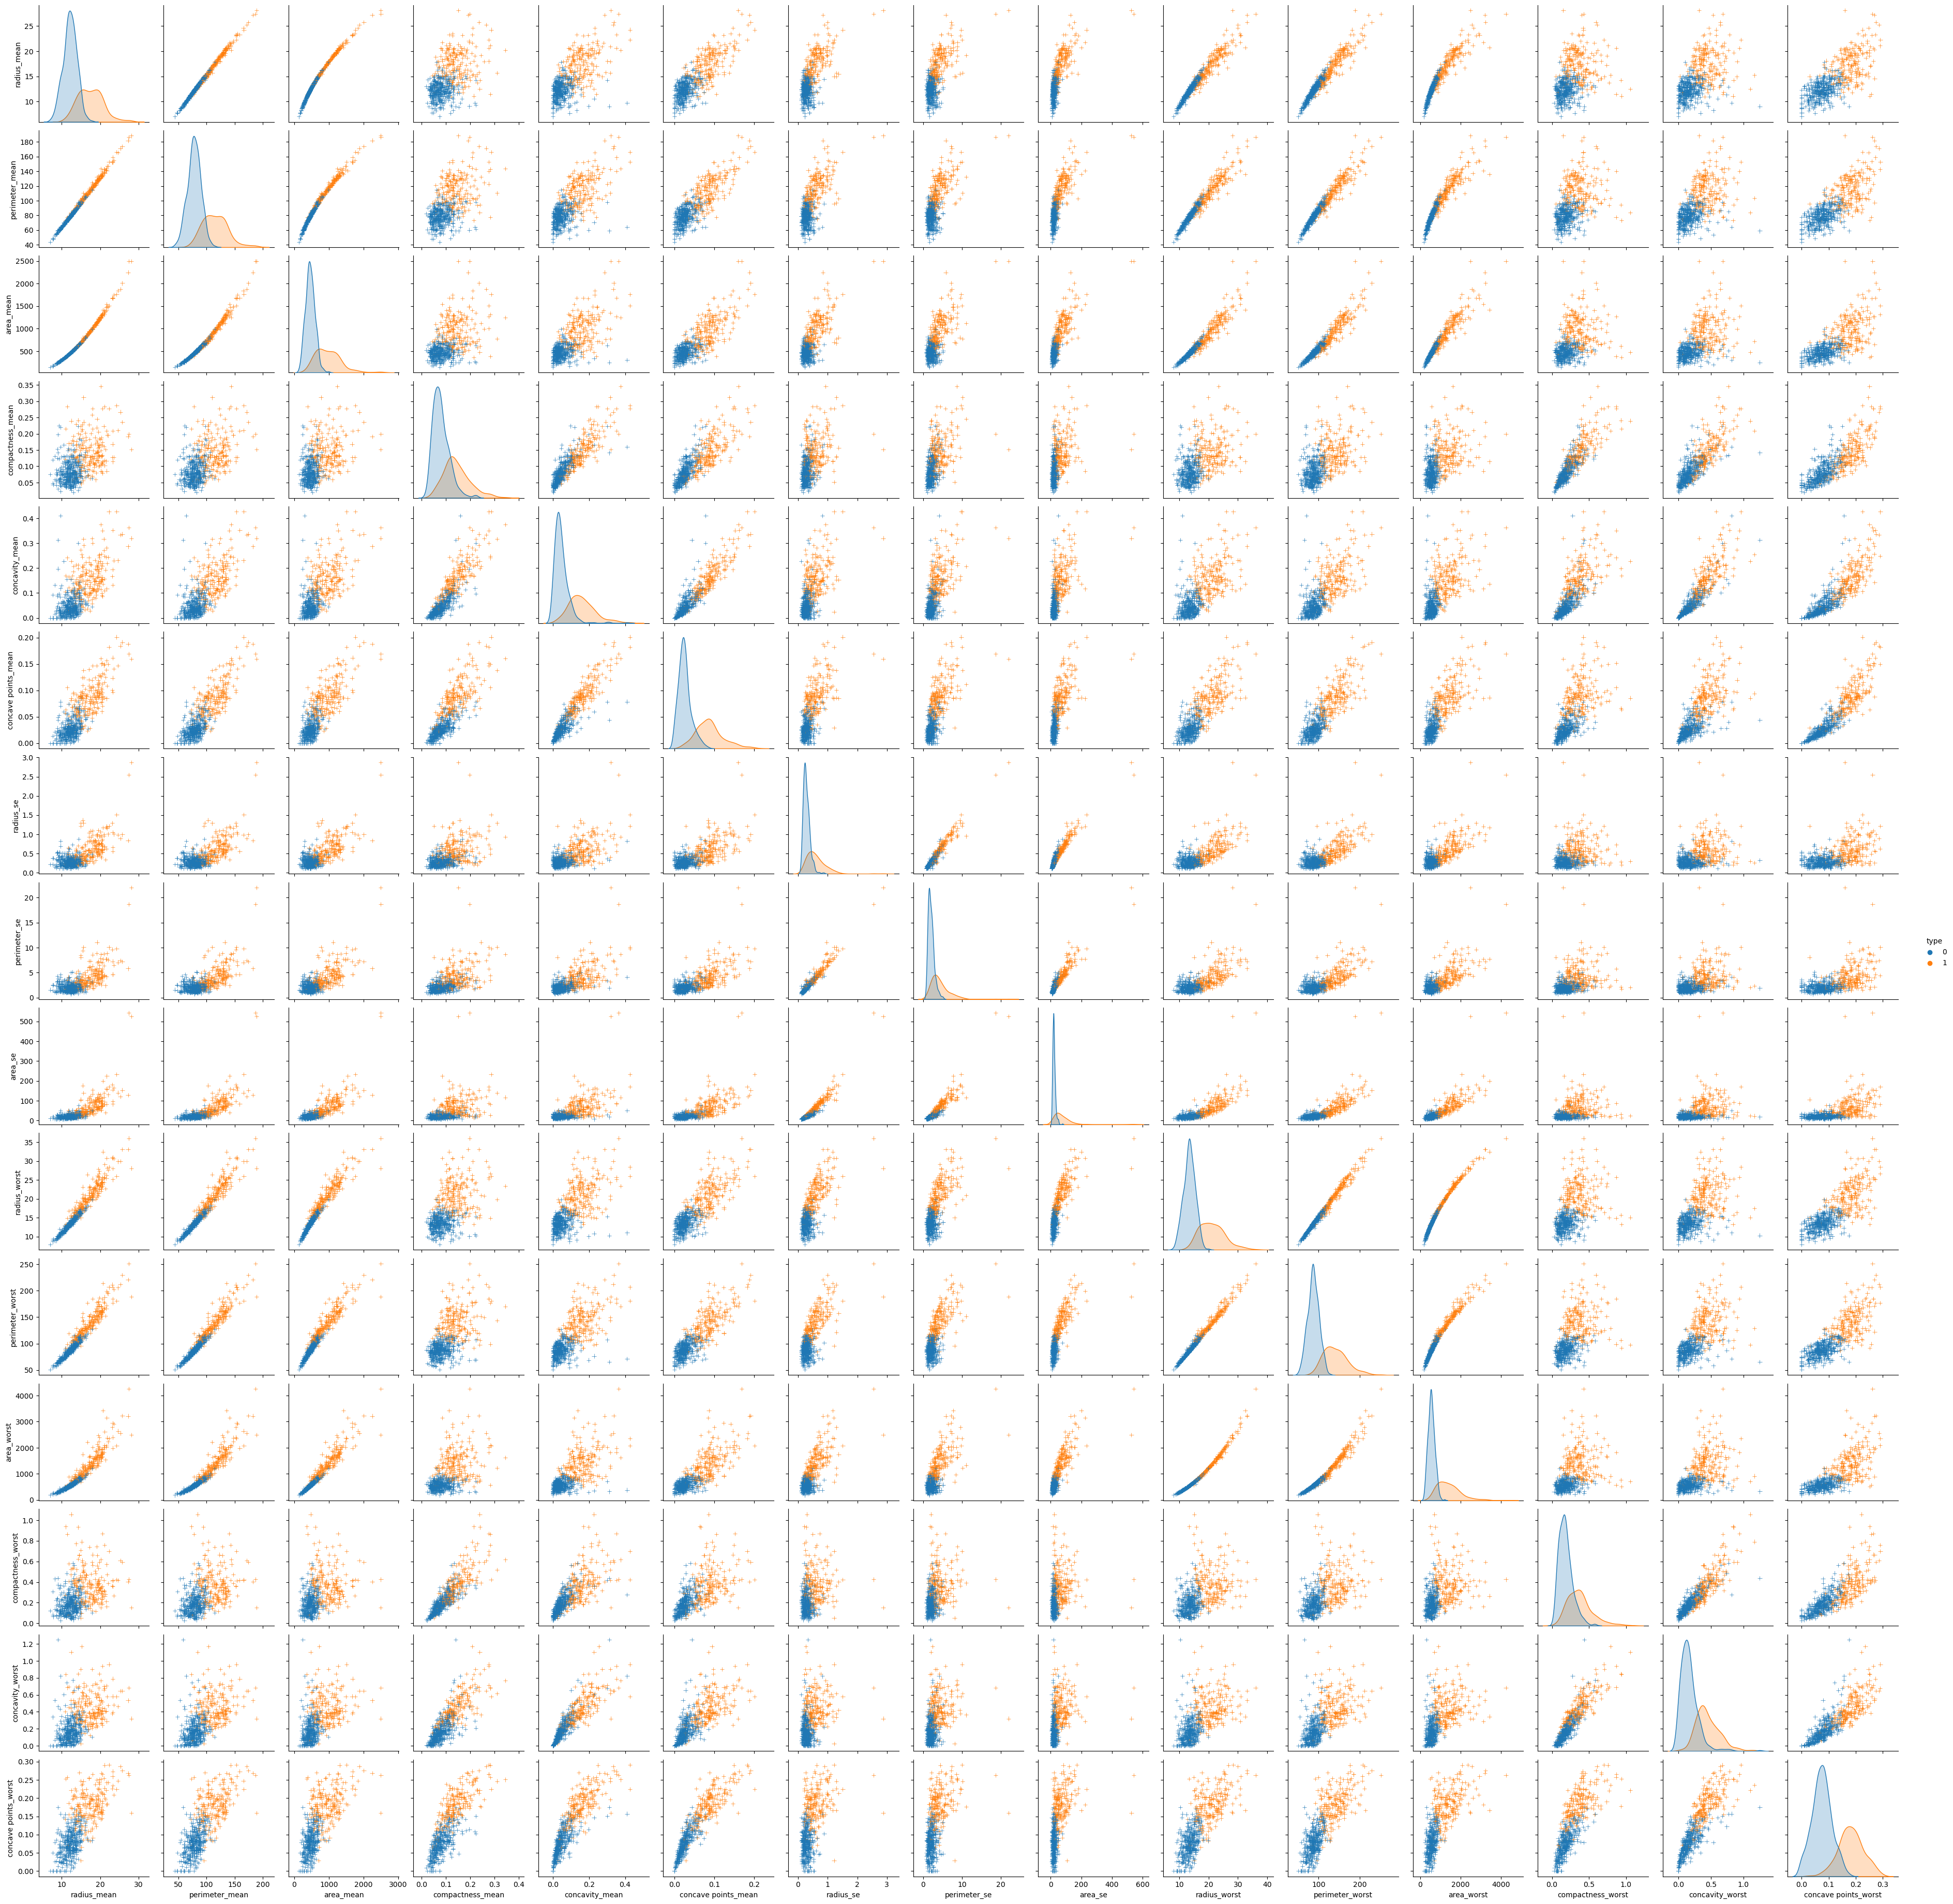

In [10]:
sns.pairplot(data[corr_features],diag_kind = "kde",markers = "+",hue = "type")
plt.show()

In [11]:
pip install --upgrade scikit-learn numpy threadpoolctl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# OUTLIER DETECTION

In [12]:
y = data["type"]
x = data.drop(["type"],axis = 1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
x_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [13]:
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

-1's are the outliers

In [14]:
outlier_score.sort_values(by = ["score"],ascending = True).head()

score
461 -3.134467
212 -2.251552
38  -2.233433
265 -2.191808
101 -2.141954

In [15]:
threshold2 = -2.5 
filter2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filter2].index.tolist()

Visualize

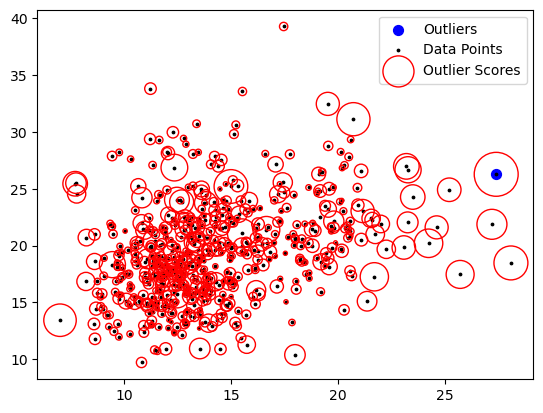

In [16]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue",s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k",s = 3, label = "Data Points")
radius = (x_score.max() - x_score)/(x_score.max() - x_score.min())
plt.scatter(x.iloc[:,0],x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [17]:
#Lets drop the outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [18]:
np.abs(corr_matrix["type"] > threshold)

type                        True
radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                     True
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

We split the data so that we can test it.
y_TEST = y[450:] y = y[:450] data_test = data.loc[450:,:] x = data.loc[:449,:]

We have created the test datas which we will use at the end.
Now lets split the data with train_test_split method

In [19]:
test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = test_size,random_state = 42)

In [20]:
# STANDARDIZATION 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train_df = pd.DataFrame(x_train,columns = columns)
x_train_df["type"] = y_train

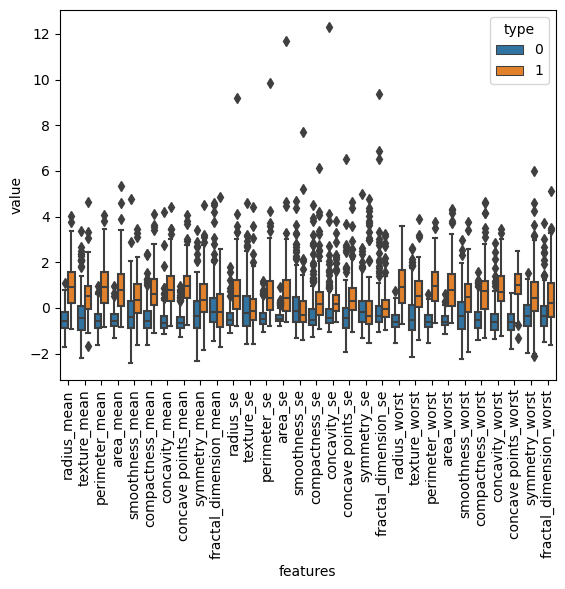

In [21]:
# Box plot
data_melted = pd.melt(x_train_df,id_vars = "type",var_name = "features",value_name = "value")
plt.figure()
sns.boxplot(x = "features",y = "value",hue = "type",data = data_melted)
plt.xticks(rotation = 90)
plt.show()

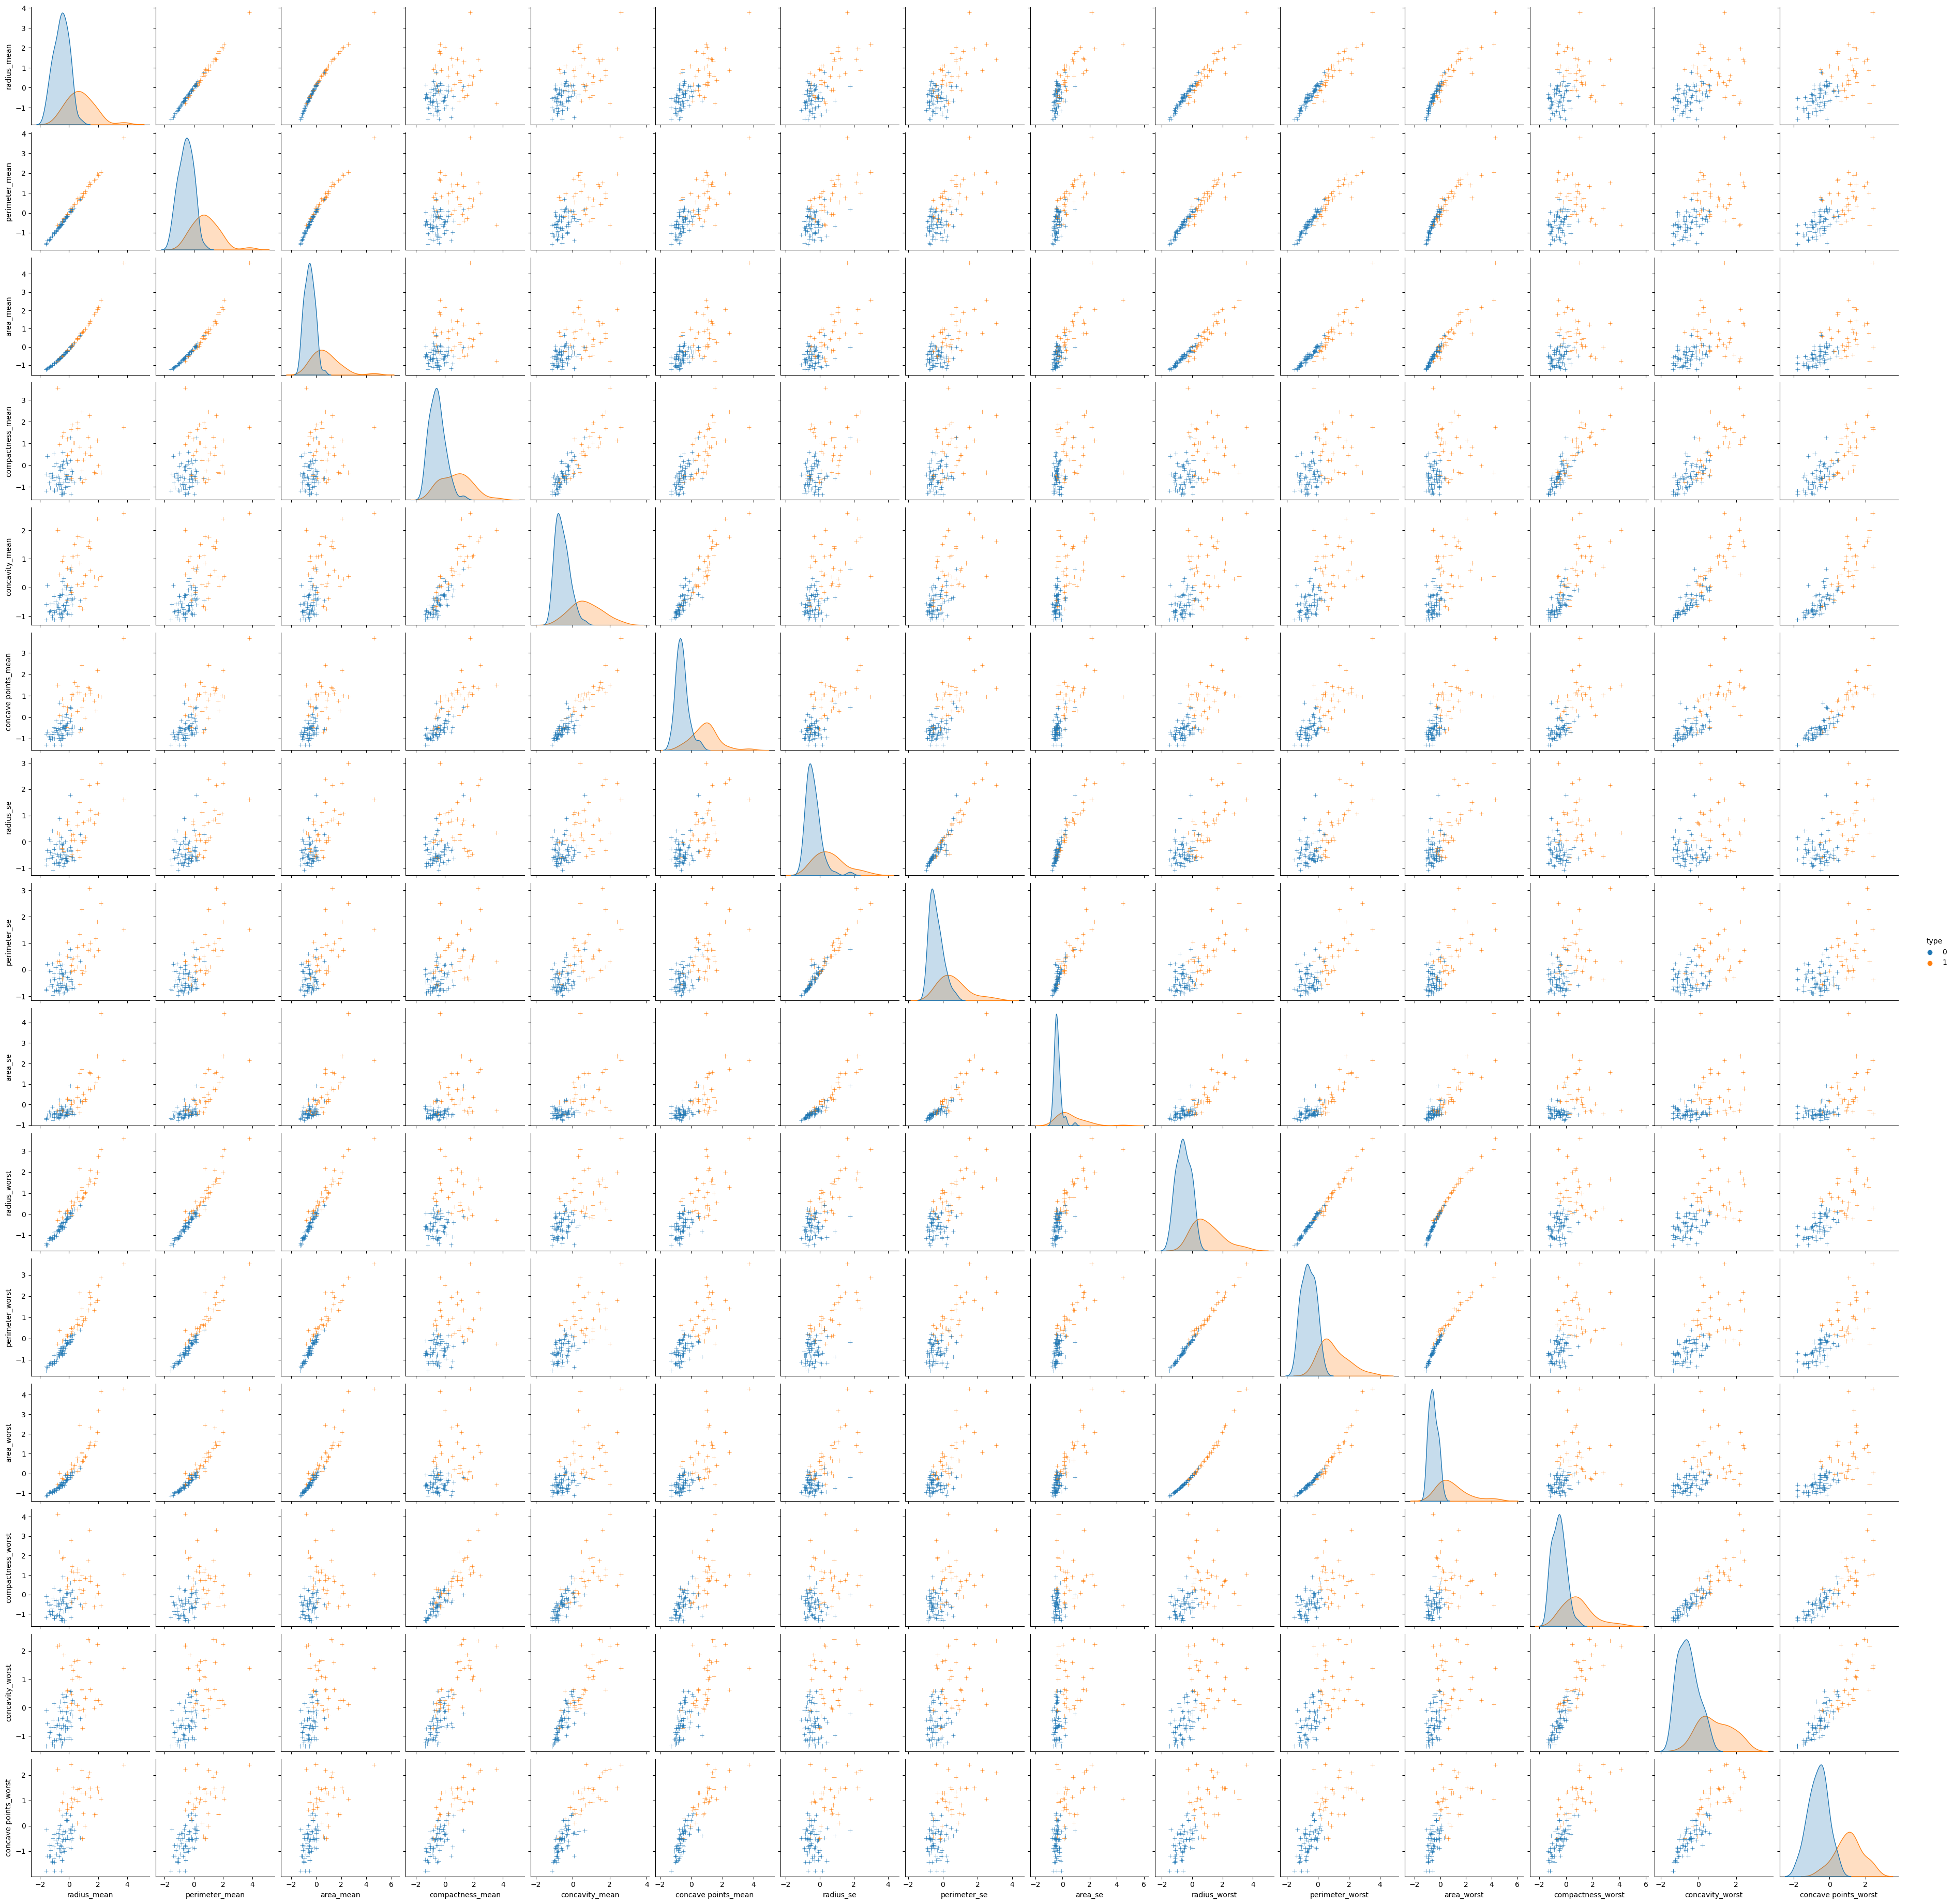

In [22]:
#Pair plot
sns.pairplot(x_train_df[corr_features].head(100),diag_kind = "kde",markers = "+",hue = "type")
plt.show()

# Basic KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(x_test,y_test)
print("Score",score)
print("CM",cm)
print("Basic KNN acc",acc)

Score 0.9532163742690059
CM [[108   1]
 [  7  55]]
Basic KNN acc 0.9532163742690059


In [24]:
"""
[[108   1]
 [  7  55]]
"""

'\n[[108   1]\n [  7  55]]\n'

In [25]:
def knn_best_parameters(x_train,x_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
   
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv = 10,scoring = "accuracy")
    grid.fit(x_train,y_train)
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print("CM Test : {}".format(cm_test))
    print("CM Train : {}".format(cm_train))
    
    
    return grid

grid = knn_best_parameters(x_train,x_test,y_train,y_test)

Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Test Score: 0.9590643274853801, Train Score: 0.9773299748110831
CM Test : [[107   2]
 [  5  57]]
CM Train : [[248   0]
 [  9 140]]


# PCA

Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Test Score: 0.9239766081871345, Train Score: 0.947103274559194
CM Test : [[103   6]
 [  7  55]]
CM Train : [[241   7]
 [ 14 135]]


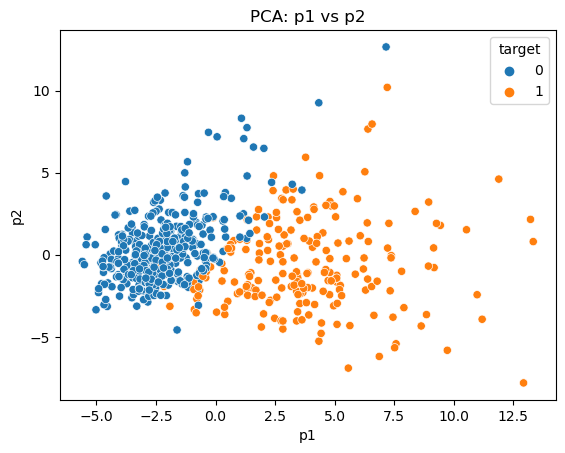

In [26]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca,columns = ["p1","p2"])
pca_data["target"] = y

sns.scatterplot(x = "p1",y = "p2",hue = "target",data = pca_data)
plt.title("PCA: p1 vs p2")

x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_reduced_pca,y,test_size = test_size,random_state = 42)
grid_pca = knn_best_parameters(x_train_pca,x_test_pca,y_train_pca,y_test_pca)

Visualization

Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

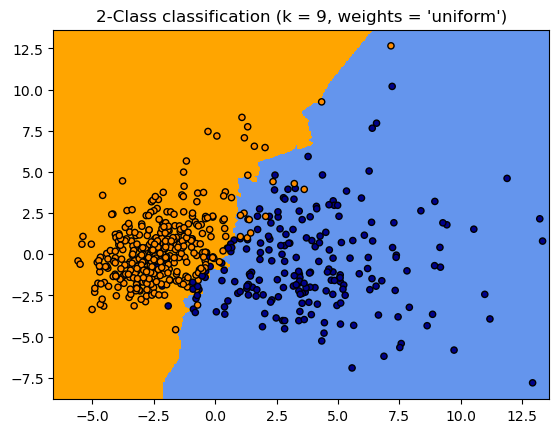

In [27]:
cmap_light = ListedColormap(["orange","cornflowerblue"])
cmap_bold = ListedColormap(["darkorange","darkblue"])

h = .05
X = x_reduced_pca
x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, y_max, h),
                  np.arange(y_min, y_max, h))
Z = grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the results into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = cmap_light)

# Plot also the training points 
plt.scatter(X[:, 0 ],X[:, 1], c= y,cmap = cmap_bold,
           edgecolor = "k",s = 20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
         % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors,grid_pca.best_estimator_.weights))

Text(0.5, 1.0, 'NCA: p1 vs p2')

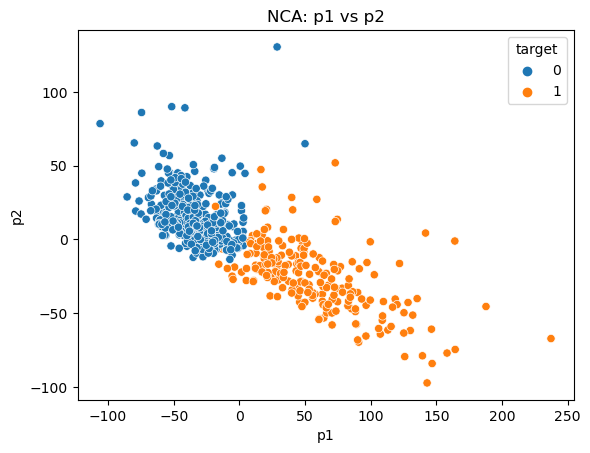

In [28]:
nca = NeighborhoodComponentsAnalysis(n_components = 2,random_state= 42)
nca.fit(x_scaled,y) #Supervised learning which needs y 
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca,columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

In [29]:
x_train_nca, x_test_nca,y_train_nca,y_test_nca = train_test_split(x_reduced_nca,y,test_size = test_size, random_state = 42)

grid_nca = knn_best_parameters(x_train_nca, x_test_nca,y_train_nca,y_test_nca)

Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Test Score: 0.9941520467836257, Train Score: 1.0
CM Test : [[108   1]
 [  0  62]]
CM Train : [[248   0]
 [  0 149]]


Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

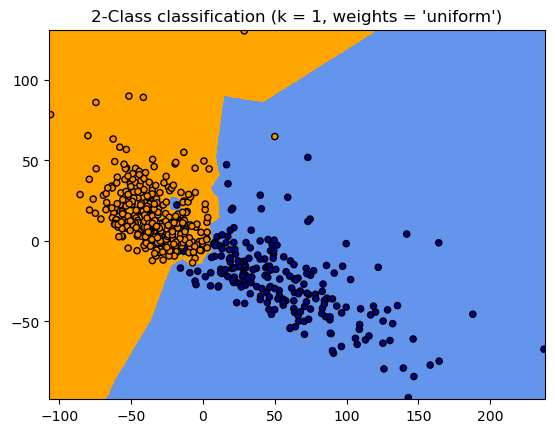

In [30]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .4 # step size in the mesh
X = x_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

# Find the wrong decision

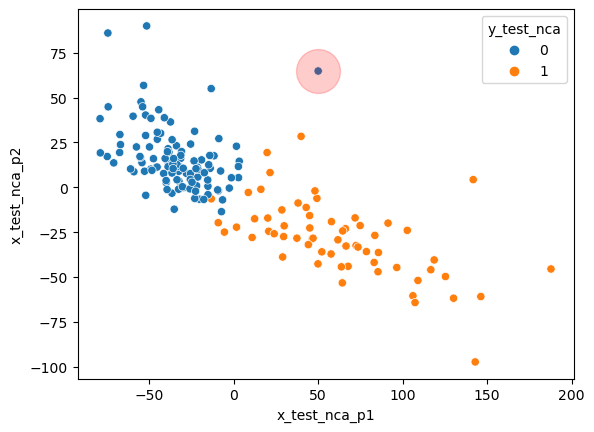

In [31]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(x_train_nca,y_train_nca)
y_pred_nca = knn.predict(x_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,y_test_nca)
knn.score(x_test_nca,y_test_nca)

test_data = pd.DataFrame()
test_data["x_test_nca_p1"] = x_test_nca[:,0]
test_data["x_test_nca_p2"] = x_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["y_test_nca"] = y_test_nca

plt.figure()
sns.scatterplot(x = "x_test_nca_p1",y = "x_test_nca_p2",hue = "y_test_nca",data = test_data)

diff = np.where(y_pred_nca!=y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)

# Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Training Acc",round(lr.score(x_train,y_train)*100,2))
print("Test acc",round(lr.score(x_test,y_test)*100,2))

Training Acc 98.99
Test acc 98.25


# HYPERPARAMETER TUNING
Decisiontree
SVM
Random Forest
KNN
Logistic Regression

In [33]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]
dt_grid = {"min_samples_split":range(10,500,20),
          "max_depth":range(1,20,2)}

svc_grid = {"kernel":["rbf"],
           "gamma":[0.001,0.01,0.1,1],
           "C": [1,10,50,100,200,300,1000]}

rf_grid = {"max_features":[1,3,10],
          "min_samples_split":[2,3,10],
          "min_samples_leaf":[1,3,10],
          "bootstrap":[False],
          "n_estimators":[100,300],
          "criterion":["gini"]}

lr_grid = {"C":np.logspace(-3,3,7),
          "penalty":["l1","l2"]}

knn_grid = {"n_neighbors":np.linspace(1,19,10,dtype = int),
           "weights":["uniform","distance"],
           "metric":["euclidean","manhattan"]}

classifier_param = [dt_grid,
                   svc_grid,
                   rf_grid,
                   lr_grid,
                   knn_grid]

In [34]:
cv_results = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],param_grid = classifier_param[i],cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_results[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.9320512820512821
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.9746794871794873
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.9595512820512822
Fitting 10 folds for each of 14 candidates, totalling 140 fits


C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

0.9746153846153847
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.9696153846153847


In [35]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_results, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

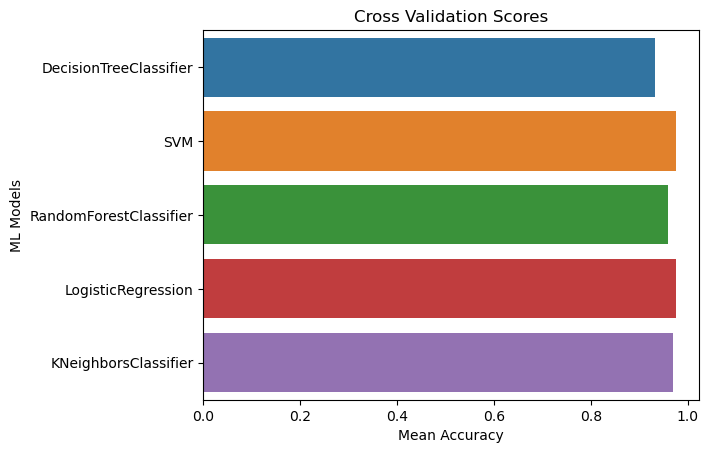

In [36]:
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")

g.set_title("Cross Validation Scores")

plt.show()
